## 파이썬 기본 문법 정리 5

### 1. Numpy

#### 주요 기능과 문법

##### 인덱싱 / 슬라이싱
- list와 사용 방법이 같다

In [295]:
import numpy as np

In [296]:
# 1차원 배열의 인덱싱
arr = np.array([10, 20, 30, 40])

print(arr[0], arr[1], arr[2], arr[3])
print(arr[-1])

10 20 30 40
40


In [297]:
# 2차원 배열의 인덱싱
arr = np.array([[1, 2, 3], [4, 5, 6]])

print(arr[0])
print(arr[0][0], arr[0][1], arr[0][2])

[1 2 3]
1 2 3


In [298]:
# 1차원 배열의 슬라이싱
arr = np.array([10, 20, 30, 40, 50])

print(arr[:])
print(arr[1:4])
print(arr[3:])

[10 20 30 40 50]
[20 30 40]
[40 50]


In [299]:
# 2차원 배열의 슬라이싱
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# array[행, 열]
print(arr[:])
print(arr[:2, 2])
print(arr[:2, 1:])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[3 6]
[[2 3]
 [5 6]]


##### 배열의 연산

In [300]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

# 배열 요소들끼리의 덧셈
print(arr1 + arr2)
# 배열 요소들끼리의 곱셈
print(arr1 * arr2)
# 배열 요소들의 제곱
print(arr1 ** 2)

[5 7 9]
[ 4 10 18]
[1 4 9]


In [301]:
# 2차원 배열의 연산
arr3 = np.array([[1, 2, 3], [4, 5, 6]])

print(arr3 + 10)

[[11 12 13]
 [14 15 16]]


##### 형 변환
- 구조 변환 : 1차원 → 다차원, 다차원 → 1차원
- 요소를 필터링

In [302]:
# 구조 변경 : 1 → 2
arr = np.array([1, 2, 3, 4, 5, 6])

# [[1, 2, 3], [4, 5, 6]]으로 변환
reshape = arr.reshape(2, 3)
print(reshape)

[[1 2 3]
 [4 5 6]]


In [303]:
# 구조 변경 : 2 → 1
arr = np.array([[1, 2, 3], [4, 5, 6]])

# [1, 2, 3, 4, 5, 6]으로 변환
flat_arr = arr.flatten()
print(flat_arr)

[1 2 3 4 5 6]


##### 필터링

In [304]:
arr = np.array([1, 2, 3, 4, 5, 6])

filter_arr = arr[arr > 3]
print(filter_arr)

[4 5 6]


##### 난수 생성
- 난수를 가진 배열 생성

In [305]:
ran_val = np.random.rand(5)
print(ran_val)

[0.83965838 0.95736652 0.35216825 0.60755828 0.62128456]


In [306]:
ran_int = np.random.randint(50, 100, size=(1, 10))
print(ran_int)

[[79 75 66 64 73 61 86 52 68 71]]


### 2. Pandas

- pip install pandas로 설치하기

In [307]:
import pandas as pd

#### DataFrame

##### DataFrame 데이터 생성
- 2차원 형식의 데이터 구조

In [308]:
data = {
    'name': ["하이", "헬로", "바이"],
    'age' : [20, 30, 35]
}

df = pd.DataFrame(data)
print(df)

  name  age
0   하이   20
1   헬로   30
2   바이   35


In [309]:
# 상위 n개의 데이터 출력 (default: 5)
print(df.head(n=1))

# 하위 n개의 데이터 출력 (default: 5)
print(df.tail(n=2))

  name  age
0   하이   20
  name  age
1   헬로   30
2   바이   35


##### filter

In [310]:
filter_df = df[df['age'] < 35]
print(filter_df)

  name  age
0   하이   20
1   헬로   30


##### 기초 통계 - 합, 평균

In [311]:
# 총 합
print(df['age'].sum())

# 평균
print(df['age'].mean())

85
28.333333333333332


##### 데이터 구조 확인

In [312]:
# 데이터의 (행, 열) 출력
print(df.shape)
# 데이터에 대한 자세한 정보 출력
print(df.info())

(3, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes
None


In [313]:
# 요약된 통계값 출력
df.describe()

,age
count,3.000000
mean,28.333333
std,7.637626
min,20.000000
25%,25.000000
50%,30.000000
75%,32.500000
max,35.000000


In [314]:
print(df['age'])
# 열 순서 바꾸기
df[['age', 'name']]

0    20
1    30
2    35
Name: age, dtype: int64


,age,name
0,20,하이
1,30,헬로
2,35,바이


In [315]:
data = {
    'name' : ['하이', '헬로', '바이'],
    'age' : [30, 25, 40],
    'score' : [90, 85, 95]
}

df = pd.DataFrame(data)

In [316]:
chk_score = df[df['score'] >= 90]
print(df)
print(chk_score)

  name  age  score
0   하이   30     90
1   헬로   25     85
2   바이   40     95
  name  age  score
0   하이   30     90
2   바이   40     95


##### Column(열) 추가

In [317]:
df['passed'] = df['score'] >= 90
print(df)

  name  age  score  passed
0   하이   30     90    True
1   헬로   25     85   False
2   바이   40     95    True


##### Row(행) 추가

In [318]:
new_row = {
    'name': ['씨야'],
    'age': 20,
    'score': 88,
    'passed': False
}

df2 = pd.DataFrame(new_row)
df3 = pd.concat([df, df2], ignore_index=True)
print(df3)

  name  age  score  passed
0   하이   30     90    True
1   헬로   25     85   False
2   바이   40     95    True
3   씨야   20     88   False


##### 데이터 수정

In [319]:
# 특정 값 수정
df3.loc[0, 'score'] = 75
# 전체 행 수정
df3['passed'] = df3['score'] >= 80

df3

,name,age,score,passed
0,하이,30,75,False
1,헬로,25,85,True
2,바이,40,95,True
3,씨야,20,88,True


##### 결측 값 처리

In [320]:
# 결측 값 생성
df3.loc[1, 'score'] = None
print(df3)

# 결측 값 확인
print(df3.isnull())

# 결측 값 채우기
df3['score'] = df3['score'].fillna(0)
print(df3)

  name  age  score  passed
0   하이   30   75.0   False
1   헬로   25    NaN    True
2   바이   40   95.0    True
3   씨야   20   88.0    True
    name    age  score  passed
0  False  False  False   False
1  False  False   True   False
2  False  False  False   False
3  False  False  False   False
  name  age  score  passed
0   하이   30   75.0   False
1   헬로   25    0.0    True
2   바이   40   95.0    True
3   씨야   20   88.0    True


In [321]:
# 결측 값 생성
df3.loc[1, 'score'] = None
print(df3)

# 결측 값 확인
print(df3.isnull())

# 결측 값 삭제
df3 = df3.dropna()
print(df3)

  name  age  score  passed
0   하이   30   75.0   False
1   헬로   25    NaN    True
2   바이   40   95.0    True
3   씨야   20   88.0    True
    name    age  score  passed
0  False  False  False   False
1  False  False   True   False
2  False  False  False   False
3  False  False  False   False
  name  age  score  passed
0   하이   30   75.0   False
2   바이   40   95.0    True
3   씨야   20   88.0    True


#### Series
- 1차원 구조를 표현하는 타입

##### Series 데이터 생성

In [322]:
s1 = pd.Series([100, 200, 300], index=['a', 'b', 'c'])
print(s1)

# 각 요소 값에 접근
print(s1['b'], s1['c'])

# 인덱스만 출력
print(s1.index)
# 값들만 출력
print(s1.values)

a    100
b    200
c    300
dtype: int64
200 300
Index(['a', 'b', 'c'], dtype='object')
[100 200 300]


In [323]:
# 상위 n개의 데이터 출력 (default: 5)
print(s1.head())
print(s1.head(1))
# 하위 n개의 데이터 출력 (default: 5)
print(s1.tail())
print(s1.tail(1))

a    100
b    200
c    300
dtype: int64
a    100
dtype: int64
a    100
b    200
c    300
dtype: int64
c    300
dtype: int64


##### 데이터 정렬

In [324]:
# 오름차순 정령
sorted_df = df.sort_values(by='score', ascending=True)
print(sorted_df)

  name  age  score  passed
1   헬로   25     85   False
0   하이   30     90    True
2   바이   40     95    True


##### 데이터 그룹화

In [325]:
data = {
    'team': ['A', 'A', 'B', 'B', 'C'],
    'score': [80, 90, 78, 88, 70]
}

df = pd.DataFrame(data)
df

,team,score
0,A,80
1,A,90
2,B,78
3,B,88
4,C,70


In [326]:
group_data = df.groupby('team')['score'].mean()
print(group_data)

team
A    85.0
B    83.0
C    70.0
Name: score, dtype: float64


##### csv 파일로 데이터 저장하기

In [327]:
df.to_csv('data/output.csv', index=False)

# output.csv
# team,score
# A,80
# A,90
# B,78
# B,88
# C,70

In [328]:
group_data.to_csv('data/result.csv')

# result.csv
# team,score
# A,87.5
# B,83.0
# C,70.0

##### csv 파일 데이터 읽기

In [329]:
data_csv = pd.read_csv('data/output.csv')
print(data_csv, type(data_csv))

  team  score
0    A     80
1    A     90
2    B     78
3    B     88
4    C     70 <class 'pandas.core.frame.DataFrame'>


### 3. 데이터 시각화

#### Matplotlib

In [330]:
import matplotlib.pyplot as plt

##### 선형 그래프 생성

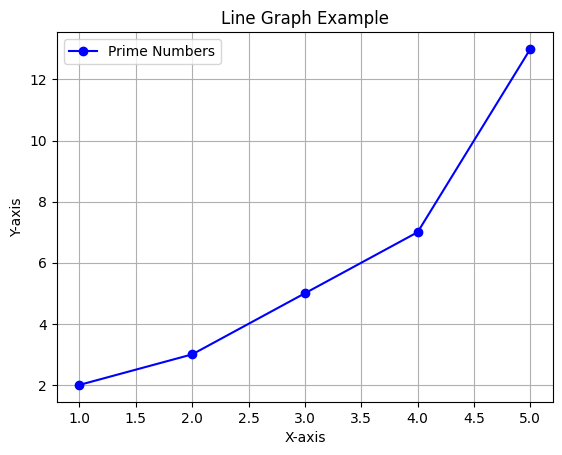

In [331]:
# 데이터
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 13]

# 그래프 생성
plt.plot(x, y, 
         marker='o', 
         linestyle='-', 
         color='b', 
         label='Prime Numbers')
 
# 그래프 꾸미기
plt.title("Line Graph Example")  # 제목
plt.xlabel("X-axis")             # x축 레이블
plt.ylabel("Y-axis")             # y축 레이블
plt.legend()                     # 범례 표시

# 그래프 출력
plt.grid(True)  # 격자 추가
plt.show()

##### 막대 그래프 (Bar Chart) 생성

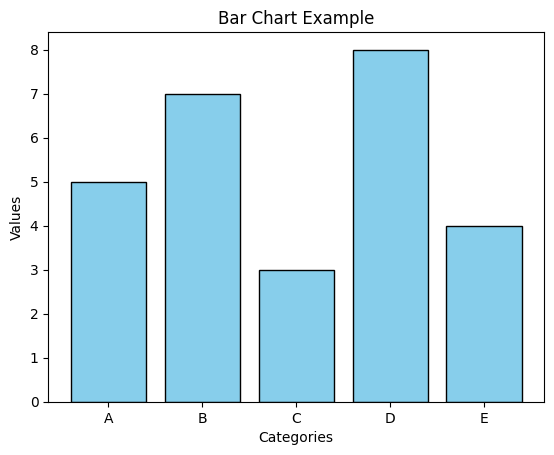

In [332]:
# 데이터
categories = ['A', 'B', 'C', 'D', 'E']
values = [5, 7, 3, 8, 4]

# 막대 그래프 생성
plt.bar(categories, values, 
        color='skyblue', 
        edgecolor='black' )

# 수평 막대 그래프
# plt.barh(categories, values, 
#          color='lightgreen', 
#          edgecolor='black')

# 그래프 꾸미기
plt.title("Bar Chart Example")  # 제목
plt.xlabel("Categories")  # x축 레이블
plt.ylabel("Values")  # y축 레이블

# 그래프 출력
plt.show()

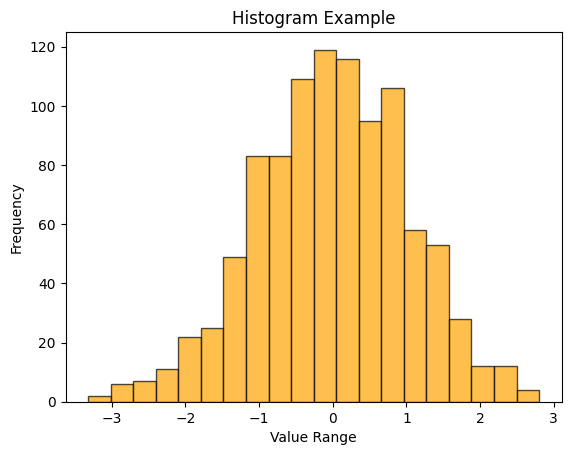

In [333]:
# 데이터
data = np.random.randn(1000)

# 히스토그램 생성
plt.hist(data, bins=20, color='orange', 
edgecolor='black', alpha=0.7)

# 그래프 꾸미기
plt.title("Histogram Example")  # 제목
plt.xlabel("Value Range")       # x축 레이블
plt.ylabel("Frequency")         # y축 레이블

# 그래프 출력
plt.show()

#### Seaborn

In [334]:
import seaborn as sns

##### 히트맵 (Heatmap)

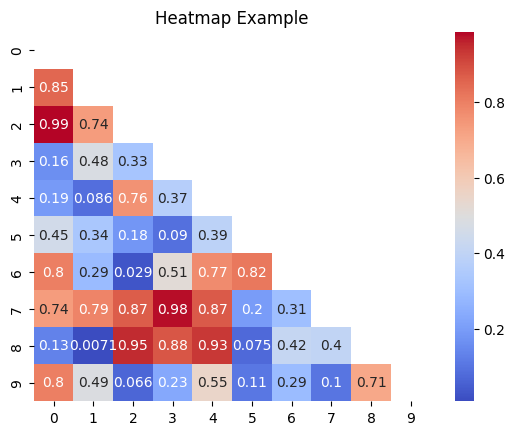

In [335]:
# 데이터
data = np.random.rand(10, 10)

mask = np.triu(np.ones_like(data, dtype=bool))    # 상단 삼각형을 마스킹
sns.heatmap(data, annot=True, mask=mask, cmap='coolwarm')

plt.title("Heatmap Example")
plt.show()

##### 박스 플롯 (Boxplot)

C:\Users\ez\AppData\Local\Temp\ipykernel_936\2305859413.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day", y="total_bill", data=tips, palette="Set2")


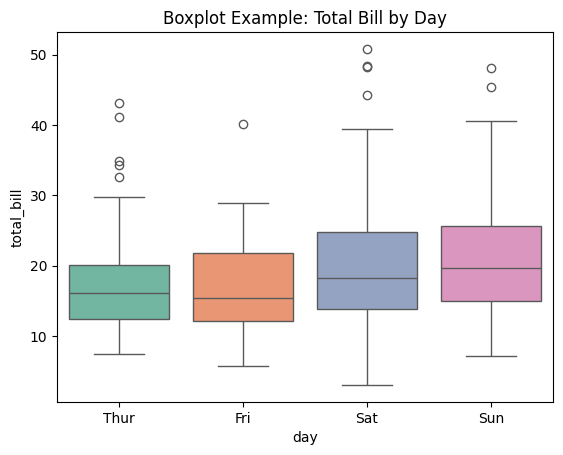

In [336]:
# 데이터
tips = sns.load_dataset("tips")

sns.boxplot(x="day", y="total_bill", data=tips, palette="Set2")

plt.title("Boxplot Example: Total Bill by Day")
plt.show()

##### 바이올린 플롯 (Violin Plot)

C:\Users\ez\AppData\Local\Temp\ipykernel_936\1824537317.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="day", y="total_bill", data=tips, palette="muted", split=True)


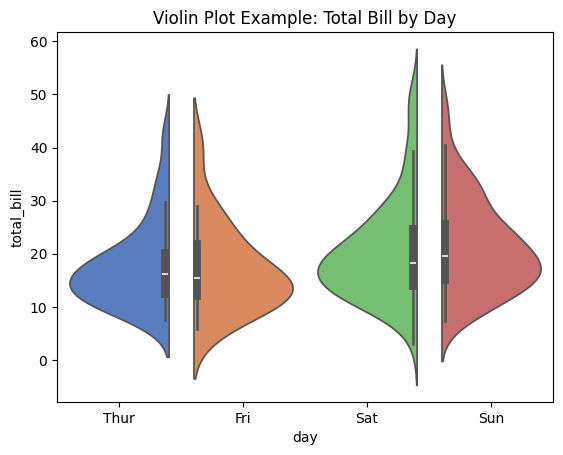

In [337]:
# 데이터
tips = sns.load_dataset("tips")

sns.violinplot(x="day", y="total_bill", data=tips, palette="muted", split=True)

plt.title("Violin Plot Example: Total Bill by Day")
plt.show()